In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
train = pd.read_csv('train.csv')  
test = pd.read_csv('test.csv')  

print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

train.drop(columns=['Unnamed: 0','id'],inplace = True)
test.drop(columns=['Unnamed: 0','id'],inplace = True)

Train data shape: (103904, 25)
Test data shape: (25976, 25)


In [10]:
# Examine the dataset
print("Number of rows:", train.shape[0])
print("Number of columns:", train.shape[1])
print("Column names:", train.columns)
print("Data types:\n", train.dtypes)



Number of rows: 103904
Number of columns: 23
Column names: Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')
Data types:
 Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking               

In [11]:
# Summary statistics
print("Summary statistics:\n", train.describe())

Summary statistics:
                  Age  Flight Distance  Inflight wifi service  \
count  103904.000000    103904.000000          103904.000000   
mean       39.379706      1189.448375               2.729683   
std        15.114964       997.147281               1.327829   
min         7.000000        31.000000               0.000000   
25%        27.000000       414.000000               2.000000   
50%        40.000000       843.000000               3.000000   
75%        51.000000      1743.000000               4.000000   
max        85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.0000

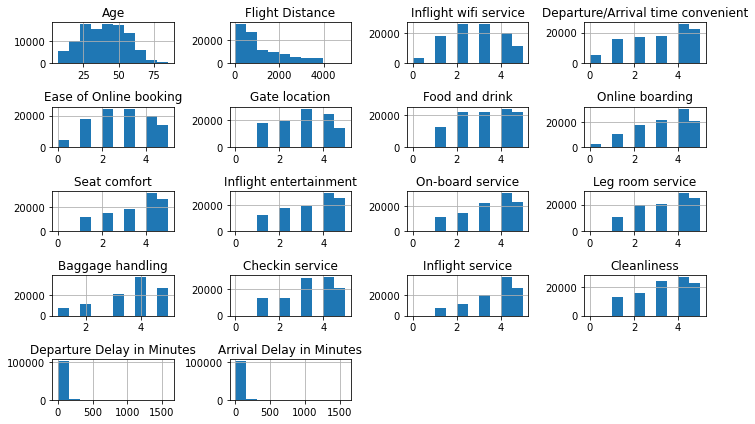

In [12]:
# Visualize the data - Histograms
train.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()


In [13]:
# Handle missing data
print("Missing values count:\n", train.isnull().sum())


Missing values count:
 Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64


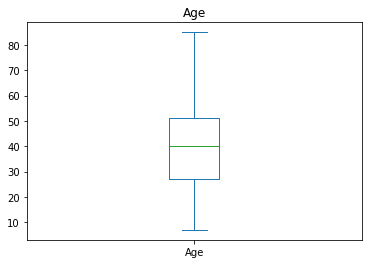

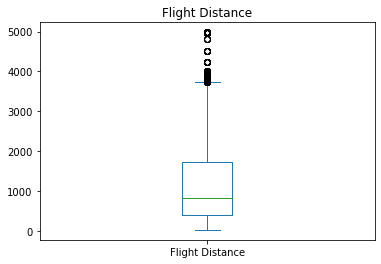

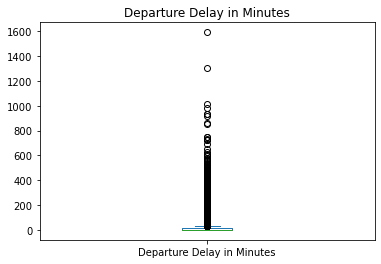

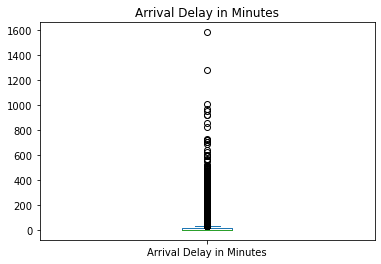

In [25]:
# # Identify outliers - Box plots
# train.plot(kind='box', figsize=(20, 10))
# plt.tight_layout()
# plt.show()

# Filter numeric columns
numeric_columns = train[['Age', 'Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']]

# Iterate over each numeric column
for column in numeric_columns:
    # Create a new figure for each column
    plt.figure(figsize=(6, 4))
    
    # Generate the box plot for the current column
    train[column].plot(kind='box')
    
    # Set the title of the figure to the column name
    plt.title(column)
    
    # Display the figure
    plt.show()

In [15]:
# Baseline Model - ZeroR
baseline_class = train['satisfaction'].value_counts().idxmax()
print("Baseline class:", baseline_class)


Baseline class: neutral or dissatisfied


In [16]:
# Random samples
random_samples = train.sample(n=5)  # Change the value of 'n' to the desired number of random samples
print("Random samples:\n", random_samples)

Random samples:
        Gender      Customer Type  Age   Type of Travel     Class  \
6806   Female  disloyal Customer   28  Business travel       Eco   
7950   Female     Loyal Customer   44  Business travel  Business   
37456    Male     Loyal Customer   60  Business travel  Business   
79599  Female     Loyal Customer   58  Personal Travel       Eco   
87213  Female     Loyal Customer   17  Business travel  Eco Plus   

       Flight Distance  Inflight wifi service  \
6806               821                      2   
7950               283                      5   
37456             2118                      5   
79599              407                      3   
87213              402                      3   

       Departure/Arrival time convenient  Ease of Online booking  \
6806                                   1                       1   
7950                                   5                       5   
37456                                  1                       5   
79599  